In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import gensim
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk import ngrams
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.stem.porter import PorterStemmer
from nltk.collocations import BigramCollocationFinder
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 

###Sentiment-Analysis
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *


from nltk.chunk import *
from nltk.chunk.util import *
from nltk.chunk.regexp import *
from nltk import Tree
from nltk.tokenize import PunktSentenceTokenizer


from sklearn.model_selection import cross_val_score

C:\Users\HP\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
ps = PorterStemmer() #word roots

In [3]:
comments = pd.read_csv('reviews.csv')
comments.insert(3,'labelSentiment',"")
comments.insert(4,'sentimentGuess',"")
stopWords = stopwords.words("english")

stopWords.append("lot")
stopWords.append("would")
stopWords.append("much")

In [4]:
sentList = []
for s in range(1000):

        comment = re.sub('[^a-zA-z]',' ',comments['Review'][s])#clean inputs except a-z

        comment = comment.lower()

        comment = comment.lower().split()
        
        
        commentS = " ".join(comment)
        
        sentList.append(commentS)

In [5]:
def preprocess(comment):



    cleanWords = []

  

    for i in range(1000):

        comment = re.sub('[^a-zA-z]',' ',comments['Review'][i])#clean inputs except a-z
        
        comment = comment.lower()

        comment = comment.lower().split()
        
        cleanWords.append(comment)

        

    result = [] 

    for i in cleanWords:

        for words in i:

            if words not in stopWords:

                result.append(words)

    

    stems = []

        

    for j in result:

        stems.append(ps.stem(j))

        

    return result, stems

In [6]:
def mostFrequent(frame, count):

    return frame.most_common(count) 

In [7]:
def displayNgrams(df, n):
    ngram = nltk.ngrams(df,n)
    for i in ngram:
        print(i)
    return ngram

In [8]:
def mostFreqBiagram(data ,frequency, n):

    set = []

    for i in dist.most_common(len(data)):

        if(i[1]>=frequency):

            set.append(i)

    ret = []

    sa = displayNgrams(set, 2)

    

    result = []

    count = 0

    for i in sa:

        if(count==n):

            break

        result.append(i)

        count += 1

    return result



In [9]:
def topTen(data):

    bigram_measures = nltk.collocations.BigramAssocMeasures()

    trigram_measures = nltk.collocations.TrigramAssocMeasures()

    finder = BigramCollocationFinder.from_words(data)

    return finder.nbest(bigram_measures.pmi, 10)

In [10]:
def score_bi_gram(bi_gram):
    bi_gram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_documents(bi_gram)
    finder.apply_freq_filter(2)
    scored = finder.score_ngrams(bi_gram_measures.pmi)
    return scored

In [11]:
def tag_given_text(text):

    text = nltk.word_tokenize(text)

    return nltk.pos_tag(text)

In [12]:
def num_of_tags(tagged_text):

    stat = {}

    for x in tagged_text:

        if x[1] in stat:

            stat[x[1]] += 1

        else:

            stat[x[1]] = 1

    return sorted(stat.items(), key=lambda x: x[1], reverse=True)[:10]

In [13]:
def get_specified_tag(tagged_text, tag):

    define_text = list()

    for k, v in tagged_text:

        if tag in v:

            define_text.append(k)

    return define_text


In [14]:
dataList, stemList = preprocess(comments)

In [15]:
dist = FreqDist(dataList)

In [16]:
lemmatizer = WordNetLemmatizer() 
lemma = []

for q in range(len(dataList)):
    lm = lemmatizer.lemmatize(dataList[q])
    lemma.append(lm)

In [17]:
print("\n\n===============Dist.most_common===============")

print(dist.most_common(10))



===============Dist.most_common===============
[('course', 757), ('great', 240), ('good', 174), ('really', 141), ('excellent', 95), ('interesting', 94), ('printing', 89), ('well', 82), ('like', 81), ('thank', 77)]


In [18]:
frequentList = mostFrequent(dist,10)

In [19]:
print("\n\n===============frequentList===============")

print(frequentList) 



===============frequentList===============
[('course', 757), ('great', 240), ('good', 174), ('really', 141), ('excellent', 95), ('interesting', 94), ('printing', 89), ('well', 82), ('like', 81), ('thank', 77)]


In [20]:
topTenList = topTen(dataList)

print("\n\n===============topTenList===============")

print(topTenList)



===============topTenList===============
[('aaha', 'moments'), ('accents', 'mildly'), ('accomplishments', 'prompting'), ('accountant', 'gene'), ('accountants', 'segments'), ('acct', 'wasting'), ('achieved', 'hi'), ('address', 'exist'), ('adquiridos', 'espero'), ('advise', 'forces')]


In [21]:
topList = score_bi_gram(preprocess(comments))



In [22]:
print("\n\n---------------myString---------------")
myString = " ".join(dataList)




---------------myString---------------


In [23]:
lastStr = []

for ii in dataList:
    if ii not in lastStr:
        lastStr.append(ii)


lastString = " ".join(lastStr)



tokens=nltk.word_tokenize(lastString)

POS = nltk.pos_tag(tokens)



In [24]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
numtag = num_of_tags(tag_given_text(lastString))

print("\n\n---------------numtag---------------")

print(numtag)



---------------numtag---------------
[('NN', 1006), ('JJ', 701), ('NNS', 442), ('VBG', 241), ('RB', 190), ('VBP', 177), ('VBD', 150), ('VBN', 109), ('VBZ', 59), ('IN', 39)]


In [26]:
data_ = mostFrequent(FreqDist(dataList), len(dataList))


last = zip(data_,numtag)
resultSet = set(last)


In [27]:
print("\n\n---Difference words and stems----")

difWordStem = zip(dataList,stemList,lemma)
resultDif = set(difWordStem)




---Difference words and stems----


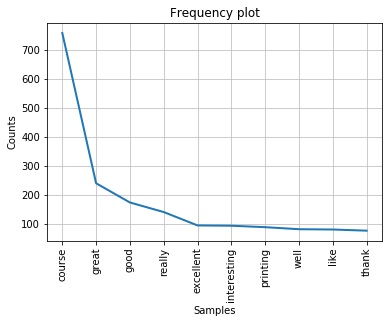

In [28]:
def plot(freqD,max_num=None,cumulative=False,title='Frequency plot',linewidth=2):

    tmp = freqD.copy()

    norm = freqD.N()

    for key in tmp.keys():

        #tmp[key] = float(freqD[key]) / norm

        tmp[key] = float(freqD[key])

    if max_num:

        tmp.plot(max_num, cumulative=cumulative,

                 title=title, linewidth=linewidth)

    else:

        tmp.plot(cumulative=cumulative, 

                 title=title, 

                 linewidth=linewidth)



    return

plot(dist,10)

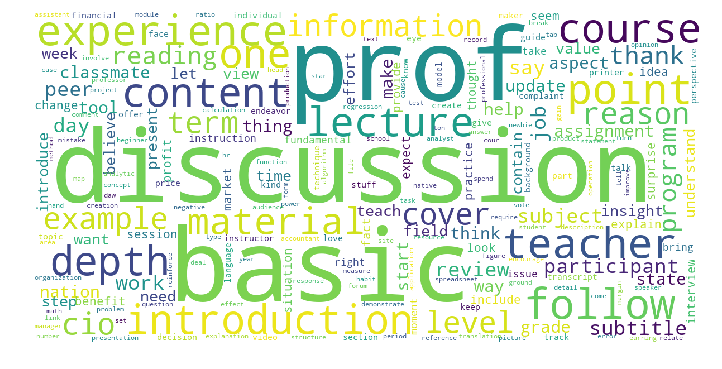

In [29]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords.words("english"),
        max_words=1000,
        max_font_size=60, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(2, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(lastString)

In [30]:
sia = SentimentIntensityAnalyzer()

listy = []

sentCounterP = 0
sentCounterN = 0
ss = sia.polarity_scores("bad idea")
listy.append(ss)
print(ss)

{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}


In [31]:
listy = []

sentCounterP = 0
sentCounterN = 0
for qq in range(1000):
    ss = sia.polarity_scores(comments["Review"][qq])
    listy.append(ss)
    #print(comments["Review"][qq])
    #print(ss)
    #print("negative",ss['neg'])
    #print("positive",ss['pos'])
    
    #comments.insert(3,'labelSentiment',"")
    #comments.insert(4,'sentimentGuess',"")
    
    n_ = ("negative",ss['neg'])
    p_ = ("positive",ss['pos'])
    
    if(n_[1]>p_[1]):
        comments["sentimentGuess"][qq] = 0
        sentCounterN = sentCounterN+1 
        #print("negative")
    else:
        comments["sentimentGuess"][qq] = 1
        sentCounterP = sentCounterP+1
        #print("positive")

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
labelCounterP = 0
labelCounterN = 0
for zz in range(1000):
    temp = comments["Label"][zz]
    if temp == 1:
        comments["labelSentiment"][zz]=0
        labelCounterN = labelCounterN+1
    else: 
        comments["labelSentiment"][zz]=1
        labelCounterP = labelCounterP+1

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


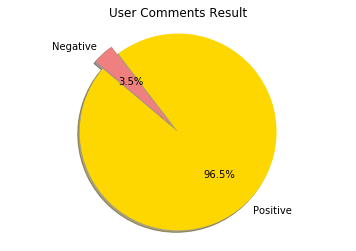

In [33]:
#### PIE CHART FOR LABELS SENTIMNENT
labels = 'Positive', 'Negative'
sizes = [labelCounterP, labelCounterN]
colors = ['gold','lightcoral']
explode = (0, 0.1)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Comments Result')
plt.axis('equal')
plt.show()

In [34]:
####PIE CHART FOR LABELS

labelCounter1 = 0
labelCounter2 = 0
labelCounter3 = 0
labelCounter4 = 0
labelCounter5 = 0
for zz in range(1000):
    temp = comments["Label"][zz]
    if temp == 1:
        
        labelCounter1 = labelCounter1+1
    elif temp==2: 
        
        labelCounter2 = labelCounter2+1
    elif temp==3: 
        
        labelCounter3 = labelCounter3+1
    elif temp==4: 
        
        labelCounter4 = labelCounter4+1
    elif temp==5: 
        
        labelCounter5 = labelCounter5+1
        
labels = '1','2','3','4',',5'
sizes = [labelCounter1, labelCounter2,labelCounter3,labelCounter4,labelCounter5]
colors = ['#ff4500','#fd5f00','gold','#98f706','#00baff']
explode = (0, 0, 0, 0, 0)

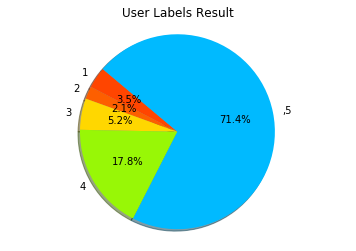

In [35]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Labels Result')
plt.axis('equal')
plt.show()

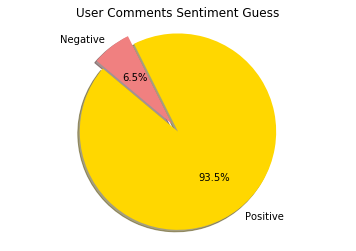

In [36]:
#######PIE CHART FOR SENTIMENT
labels = 'Positive', 'Negative'
sizes = [sentCounterP, sentCounterN]
colors = ['gold','lightcoral']
explode = (0, 0.1)  
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('User Comments Sentiment Guess')
plt.axis('equal')
plt.show()


In [37]:
#########SENTIMENT FOR WORDS

listy_ = []
negativeWords = []
positiveWords = []

for j in range(len(dataList)):
     ssWord = sia.polarity_scores(dataList[j])
     listy_.append(ssWord)
     
     wN_ = ("negative",ssWord['neg'])
     wP_ = ("positive",ssWord['pos'])
    
     if(wN_[1]>wP_[1]):
        negativeWords.append(dataList[j])
         
        #print("negative")
     else:
        positiveWords.append(dataList[j])

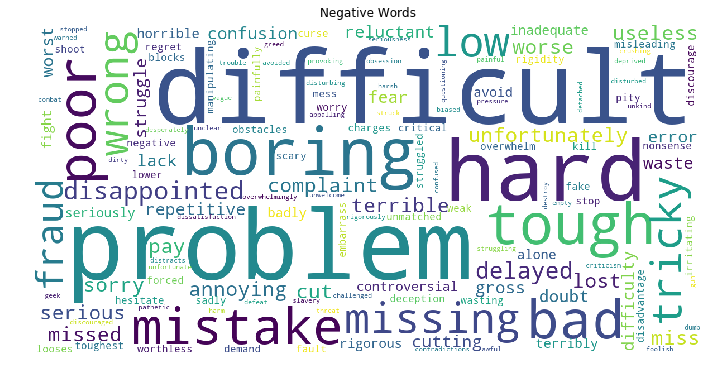

In [38]:
negativeWordsString = " ".join(negativeWords)

def show_wordcloud_negative_words(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords.words("english"),
        max_words=1000,
        max_font_size=60, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(2, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title("Negative Words")
    plt.show()
    
show_wordcloud_negative_words(negativeWordsString)

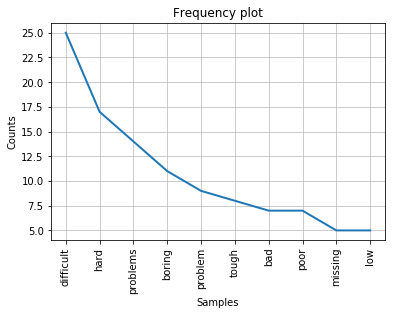

In [39]:
distNegativeWords = FreqDist(negativeWords)

def plotPNegativeeWords(freqD,max_num=None,cumulative=False,title='Frequency plot',linewidth=2):

    tmp = freqD.copy()

    norm = freqD.N()

    for key in tmp.keys():

        #tmp[key] = float(freqD[key]) / norm

        tmp[key] = float(freqD[key])

    if max_num:

        tmp.plot(max_num, cumulative=cumulative,

                 title=title, linewidth=linewidth)

    else:

        tmp.plot(cumulative=cumulative, 

                 title=title, 

                 linewidth=linewidth)



    return

plot(distNegativeWords,10)

In [40]:
###FREQUENCY of NEGATIVE WORDS
dist_ = FreqDist(negativeWords)

frequentListNegativeWords = mostFrequent(dist_,10)

In [41]:
print("\n\n===============frequentList===============")

print(frequentListNegativeWords)



===============frequentList===============
[('difficult', 25), ('hard', 17), ('problems', 14), ('boring', 11), ('problem', 9), ('tough', 8), ('bad', 7), ('poor', 7), ('missing', 5), ('low', 5)]


In [42]:
 #############   BoW  #############

from sklearn.model_selection import train_test_split      
    
X_train, X_test, y_train, y_test = train_test_split(comments['Review'][:1000].values,
                            comments['Label'][:1000].values,test_size=0.3)    
    

import spacy,string

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [43]:
###Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
####### NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


naive = MultinomialNB()
classifier = naive.fit(tf_train,y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       1.00      0.07      0.12        15
           4       0.29      0.04      0.07        54
           5       0.73      0.99      0.84       215

   micro avg       0.72      0.72      0.72       300
   macro avg       0.40      0.22      0.21       300
weighted avg       0.62      0.72      0.62       300

Accuracy:  0.7166666666666667


In [46]:
######## LOGISTIC REGRESSION

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


LogReg = LogisticRegression()
LogReg.fit(tf_train, y_train)

y_pred = LogReg.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.50      0.09      0.15        11
           2       0.00      0.00      0.00         5
           3       0.40      0.13      0.20        15
           4       0.42      0.19      0.26        54
           5       0.77      0.96      0.85       215

   micro avg       0.73      0.73      0.73       300
   macro avg       0.42      0.27      0.29       300
weighted avg       0.67      0.73      0.67       300

Accuracy:  0.73


In [47]:
#########   KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(tf_train, y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        15
           4       0.39      0.20      0.27        54
           5       0.74      0.93      0.82       215

   micro avg       0.70      0.70      0.70       300
   macro avg       0.23      0.23      0.22       300
weighted avg       0.60      0.70      0.64       300

Accuracy:  0.7033333333333334


In [48]:
#######     SVM

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(tf_train, y_train)
y_pred = classifier.predict(tf_test)
print(classification_report(y_test, y_pred))
accuracy = (y_pred == y_test).mean()
print("Accuracy: ",accuracy)


              precision    recall  f1-score   support

           1       0.40      0.18      0.25        11
           2       0.12      0.20      0.15         5
           3       0.12      0.13      0.12        15
           4       0.26      0.20      0.23        54
           5       0.81      0.85      0.83       215

   micro avg       0.66      0.66      0.66       300
   macro avg       0.34      0.31      0.32       300
weighted avg       0.65      0.66      0.65       300

Accuracy:  0.6633333333333333


In [49]:
#############   word embedding for sentimentGuess ##############


xTrain = comments.loc[:499,"Review"].values
yTrain = comments.loc[:499,"sentimentGuess"].values

xTest = comments.loc[500:999,"Review"].values
yTest = comments.loc[500:999,"sentimentGuess"].values


X = np.concatenate((xTrain, xTest), axis=0)
y = np.concatenate((yTrain, yTest), axis=0)

In [50]:
print(X.shape)
print(y.shape)

(1000,)
(1000,)


In [51]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
tokenizer_obj = Tokenizer()
total_reviews = xTrain + xTest
tokenizer_obj.fit_on_texts(total_reviews)

max_length = max([len(s.split()) for s in total_reviews])

vocab_size = len(tokenizer_obj.word_index) + 1

xTrain_tokens = tokenizer_obj.texts_to_sequences(xTrain)
xTest_tokens = tokenizer_obj.texts_to_sequences(xTest)

xTrain_pad = pad_sequences(xTrain_tokens, maxlen=max_length, padding='post')
xTest_pad = pad_sequences(xTest_tokens, maxlen=max_length, padding='post')

In [53]:
print(vocab_size)

3567


In [54]:
EMBEDDING_DIM = 100 


Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)


print("build model...")

build model...


In [55]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

print("train...")

model.fit(xTrain_pad, yTrain, batch_size=128, epochs=25, validation_data=(xTest_pad,yTest),verbose=2)

train...
Instructions for updating:
Use tf.cast instead.
Train on 500 samples, validate on 500 samples
Epoch 1/25
 - 9s - loss: 0.6623 - acc: 0.8720 - val_loss: 0.6208 - val_acc: 0.9260
Epoch 2/25
 - 8s - loss: 0.5917 - acc: 0.9440 - val_loss: 0.5548 - val_acc: 0.9260
Epoch 3/25
 - 8s - loss: 0.5210 - acc: 0.9440 - val_loss: 0.4872 - val_acc: 0.9260
Epoch 4/25
 - 9s - loss: 0.4506 - acc: 0.9440 - val_loss: 0.4177 - val_acc: 0.9260
Epoch 5/25
 - 9s - loss: 0.3779 - acc: 0.9440 - val_loss: 0.3508 - val_acc: 0.9260
Epoch 6/25
 - 9s - loss: 0.3031 - acc: 0.9440 - val_loss: 0.2960 - val_acc: 0.9260
Epoch 7/25
 - 10s - loss: 0.2540 - acc: 0.9440 - val_loss: 0.2667 - val_acc: 0.9260
Epoch 8/25
 - 8s - loss: 0.2197 - acc: 0.9440 - val_loss: 0.2679 - val_acc: 0.9260
Epoch 9/25
 - 9s - loss: 0.2204 - acc: 0.9440 - val_loss: 0.2836 - val_acc: 0.9260
Epoch 10/25
 - 9s - loss: 0.2272 - acc: 0.9440 - val_loss: 0.2906 - val_acc: 0.9260
Epoch 11/25
 - 8s - loss: 0.2278 - acc: 0.9440 - val_loss: 0.2861

In [57]:
############# TESTING

print('Testing...')
score, acc = model.evaluate(xTest_pad, yTest, batch_size=128)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))

Testing...
500/500 [==============================] - ETA:  - ETA:  - ETA:  - 3s 5ms/step
Test score: 0.2674143648147583
Test accuracy: 0.9259999961853027
Accuracy: 92.60%


In [58]:
arraySamp = []

for i in range(100):
    arraySamp.append(comments["Review"][i])

test_samples_tokens = tokenizer_obj.texts_to_sequences(arraySamp)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=max_length)

#predict
model.predict(x=test_samples_tokens_pad)

array([[0.86190283],
       [0.6273181 ],
       [0.64980406],
       [0.6405404 ],
       [0.7392432 ],
       [0.7055299 ],
       [0.73364365],
       [0.66382325],
       [0.8251604 ],
       [0.6947584 ],
       [0.63155967],
       [0.80967784],
       [0.66552615],
       [0.6104756 ],
       [0.67454624],
       [0.6139061 ],
       [0.75126374],
       [0.7174438 ],
       [0.67353165],
       [0.5876964 ],
       [0.7202026 ],
       [0.67914414],
       [0.6583778 ],
       [0.75211537],
       [0.81354845],
       [0.71378833],
       [0.7056204 ],
       [0.7525611 ],
       [0.6706539 ],
       [0.69924283],
       [0.7044219 ],
       [0.7171811 ],
       [0.862497  ],
       [0.9042971 ],
       [0.64559925],
       [0.7171491 ],
       [0.71392727],
       [0.7052811 ],
       [0.65004075],
       [0.85832703],
       [0.7171258 ],
       [0.6522949 ],
       [0.6988288 ],
       [0.7031796 ],
       [0.63565624],
       [0.6519538 ],
       [0.7925956 ],
       [0.819

In [59]:
#let us check how the model predicts
classes = model.predict(xTest_pad[:100], batch_size=128)
for i in range(100):
    if(classes[i] > 0.5 and yTest[i] == 1 or (classes[i] <= 0.5 and yTest[i] == 0)):
        print( classes[i], yTest[i], " Right prediction")
    else:
        print( classes[i], yTest[i], " Wrong prediction")

[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 0  Wrong prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.9460523] 1  Right prediction
[0.94605